## Importing important modules for Data Analysis

In [1]:
## impport common modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [2]:
## install pyreadstat module
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.0 MB/s eta 0:00:00


## 1. Data Acquisition

In [3]:
df_fhs = pd.read_csv('heart_dataset.csv')

1.1 Scanning the dataframe

In [ ]:
## What does the dataframe look like
df_fhs.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
## dimensions
df_fhs.shape

(918, 12)

In [ ]:
## datatypes of the columns
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## 2. Filtering the dataset

In [ ]:
## deleting the id variables which are not useful for the dataset
df_fhs= df_fhs.drop(['Oldpeak'], axis=1)

In [ ]:
df_fhs.shape

(918, 11)

In [ ]:
## finding the missing value
df_fhs.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## which columns are missingvalues and to what extent
df_fhs.isnull().sum()#/len(df_fhs)*100

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Slope          0
HeartDisease      0
dtype: int64

Other ways to find missing values using libraries

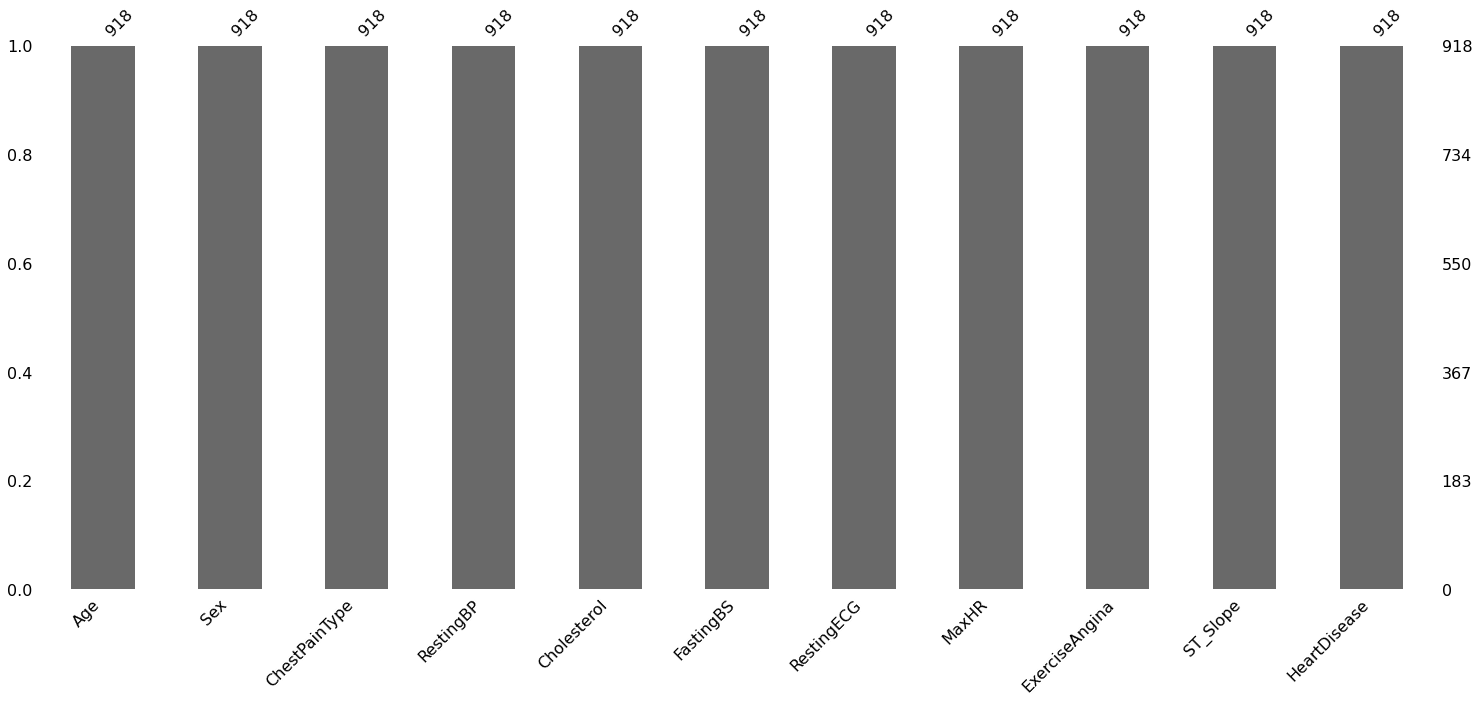

In [ ]:
import missingno as msno

## visualizing the relative missingness of columns
msno.bar(df_fhs)
plt.show()

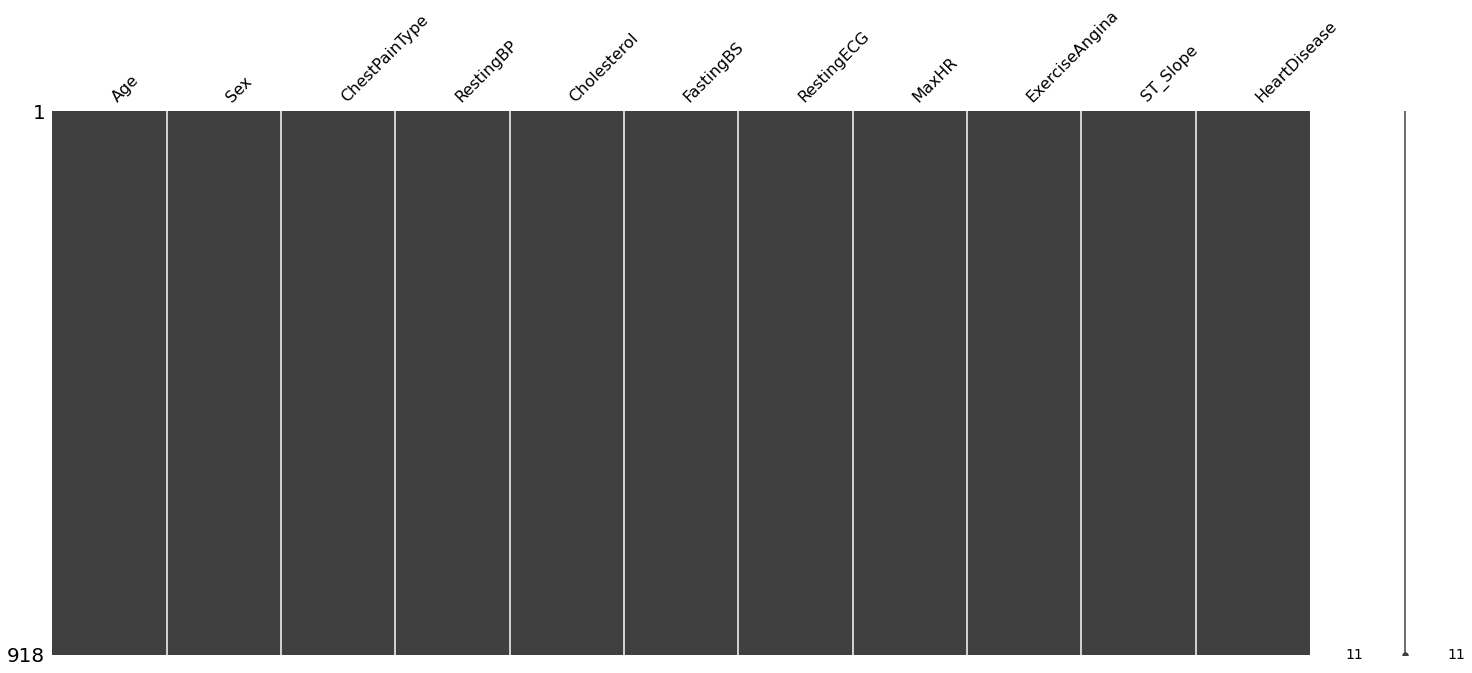

In [ ]:
import missingno as msno

## visualizing the relative missingness of columns
msno.matrix(df_fhs)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


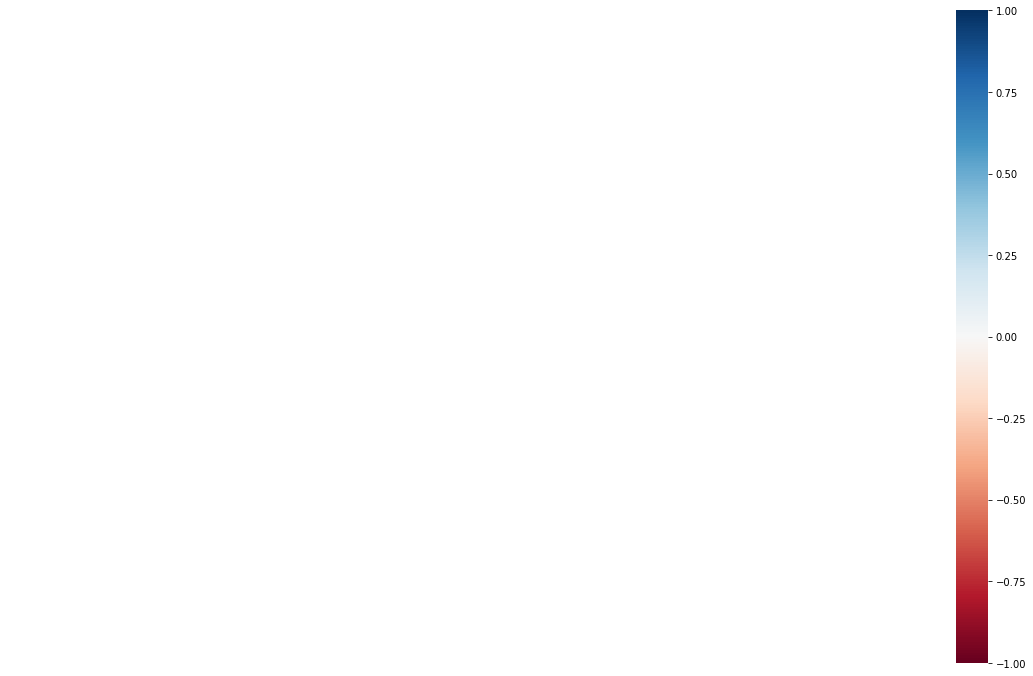

In [ ]:
import missingno as msno

## visualizing the relative missingness of columns
msno.heatmap(df_fhs)
plt.show()

Checking for Duplicates

In [ ]:
## how to check for row duplicates
df_fhs.duplicated().sum()

0

In [ ]:
## remove duplicates
## df_fhs.drop_duplicates(['subset'])

## 3. DATA TRANSFORMATION (transforming text to integer and giving it's own catagory)

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   ST_Slope        918 non-null    object
 10  HeartDisease    918 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 79.0+ KB


Transforming text to integer

In [ ]:
df_fhs['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df_fhs['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
df_fhs['Sex']= df_fhs['Sex'].replace(['M','F'],[1,2])

In [ ]:
df_fhs['Sex'].unique()

array([1, 2])

In [ ]:
df_fhs['Sex'].value_counts()

1    725
2    193
Name: Sex, dtype: int64

 Get Dummies (gets each of the catagory it's own numbers)

In [ ]:
pd.get_dummies(df_fhs['Sex'])

,1,2
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,1,0
916,0,1


other method instead of using Get Dummy

In [ ]:
## Importing LabelEncoder from Sklearn library from preprocessing module
from sklearn.preprocessing import LabelEncoder


In [ ]:
## Creating an instance pf LabelEncoder
le= LabelEncoder()

In [ ]:
df_fhs['Sex_le'] = le.fit_transform(df_fhs['Sex'])
df_fhs['Sex_le'].value_counts()

0    725
1    193
Name: Sex_le, dtype: int64

Converting the datetime text to Pandas datetime

In [ ]:
## Convert datr string to Pandas datetime object

## Exploratory Data Analysis

Target Variable

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    int64 
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   ST_Slope        918 non-null    object
 10  HeartDisease    918 non-null    int64 
 11  Sex_le          918 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 86.2+ KB


In [ ]:
df_fhs['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: >

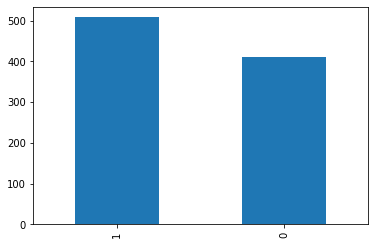

In [ ]:
df_fhs['HeartDisease'].value_counts().plot(kind='bar')

In [ ]:
df_fhs.groupby('Sex').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Sex_le
Sex,,,,,,,
1,53.782069,132.445517,187.513103,0.259310,134.325517,0.631724,0.0
2,52.492228,132.212435,241.196891,0.134715,146.139896,0.259067,1.0


In [ ]:
df_fhs['Sex'] = df_fhs['Sex'].replace([1,2],['Male','Female'])

In [ ]:
df_fhs.groupby('Sex')['HeartDisease'].mean()

Sex
Female    0.259067
Male      0.631724
Name: HeartDisease, dtype: float64

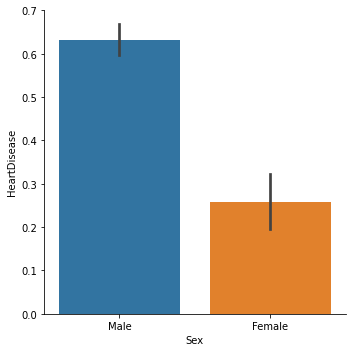

In [ ]:
sns.catplot(data=df_fhs, y='HeartDisease', x= 'Sex' , kind='bar')
plt.show()

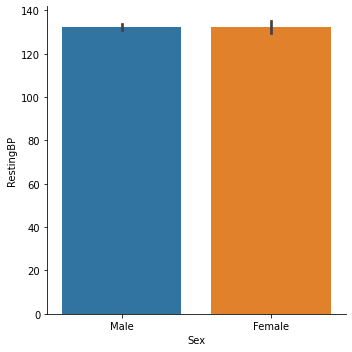

In [ ]:
sns.catplot(data=df_fhs, y='RestingBP', x= 'Sex', kind='bar')
plt.show()

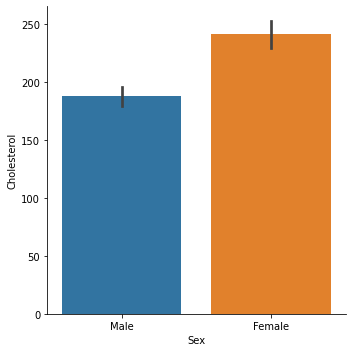

In [ ]:
sns.catplot(data=df_fhs, y='Cholesterol', x= 'Sex', kind='bar')
plt.show()

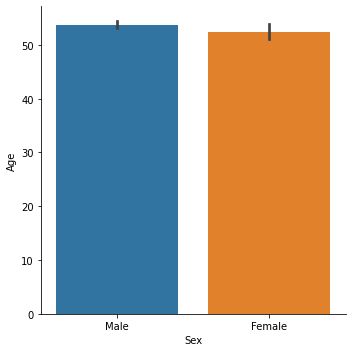

In [ ]:
sns.catplot(data=df_fhs, y='Age', x= 'Sex', kind='bar')
plt.show()

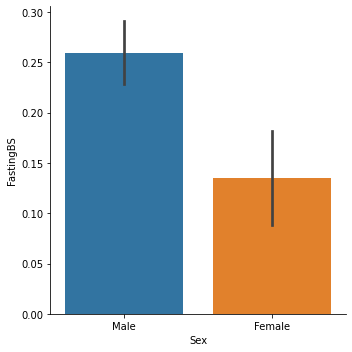

In [ ]:
sns.catplot(data=df_fhs, y='FastingBS', x= 'Sex', kind='bar')
plt.show()

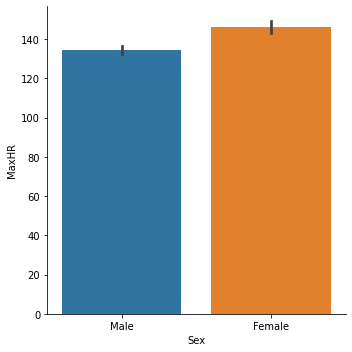

In [ ]:
sns.catplot(data=df_fhs, y='MaxHR', x= 'Sex', kind='bar')
plt.show()

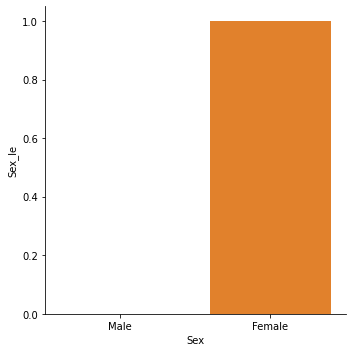

In [ ]:
sns.catplot(data=df_fhs, y='Sex_le', x= 'Sex' , kind='bar')
plt.show()

## Seperating Categorical Variables

In [ ]:
## filter out a subset of categorical variables
fhs_cat = df_fhs.select_dtypes(include=['object'])
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    object
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    object
 4   ST_Slope        918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


In [ ]:
## catagorical datas labelled  in integer
fhs_cat.nunique().sort_values()

Sex               2
ExerciseAngina    2
RestingECG        3
ST_Slope          3
ChestPainType     4
dtype: int64

In [ ]:
df_fhs.nunique().sort_values()

Sex                 2
FastingBS           2
ExerciseAngina      2
HeartDisease        2
Sex_le              2
RestingECG          3
ST_Slope            3
ChestPainType       4
Age                50
RestingBP          67
MaxHR             119
Cholesterol       222
dtype: int64

In [ ]:
cool_int = df_fhs.nunique().reset_index()
cool_int

,index,0
0,Age,50
1,Sex,2
2,ChestPainType,4
3,RestingBP,67
4,Cholesterol,222
5,FastingBS,2
6,RestingECG,3
7,MaxHR,119
8,ExerciseAngina,2
9,ST_Slope,3


## Type Casting CAtegorical Variables

In [ ]:
## changing all the data type to integers
cool_int.columns=['features', 'object']
cool_int['object'] = cool_int['object'].astype('int64')

In [ ]:
## sort columns based on the number of unique values
cool_int = cool_int.sort_values(by='object')
cool_int = cool_int[cool_int.object<10]
cool_int.features.values

array(['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease', 'Sex_le',
       'RestingECG', 'ST_Slope', 'ChestPainType'], dtype=object)

In [ ]:
## display subset of integer_type catagorical variable
fhs_cat = df_fhs[cool_int.features.values]
fhs_cat

,Sex,FastingBS,ExerciseAngina,HeartDisease,Sex_le,RestingECG,ST_Slope,ChestPainType
0,Male,0,N,0,0,Normal,Up,ATA
1,Female,0,N,1,1,Normal,Flat,NAP
2,Male,0,N,0,0,ST,Up,ATA
3,Female,0,Y,1,1,Normal,Flat,ASY
4,Male,0,N,0,0,Normal,Up,NAP
...,...,...,...,...,...,...,...,...
913,Male,0,N,1,0,Normal,Flat,TA
914,Male,1,N,1,0,Normal,Flat,ASY
915,Male,0,Y,1,0,Normal,Flat,ASY
916,Female,0,N,1,1,LVH,Flat,ATA


In [ ]:
fhs_cat.columns

Index(['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease', 'Sex_le',
       'RestingECG', 'ST_Slope', 'ChestPainType'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='count'>

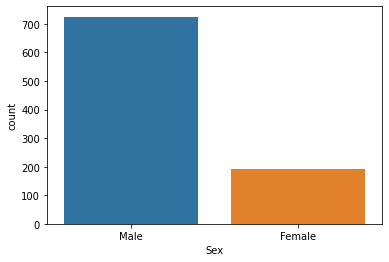

In [ ]:
sns.countplot(data=fhs_cat , x='Sex')

<Axes: xlabel='HeartDisease', ylabel='count'>

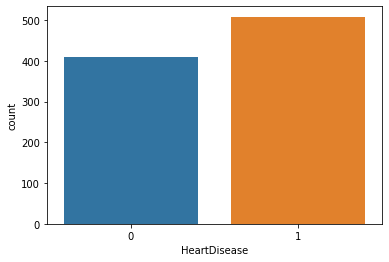

In [ ]:
sns.countplot(data=fhs_cat , x='HeartDisease')

<Axes: xlabel='ChestPainType', ylabel='count'>

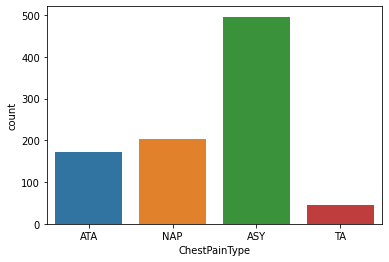

In [ ]:
sns.countplot(data=fhs_cat , x='ChestPainType')

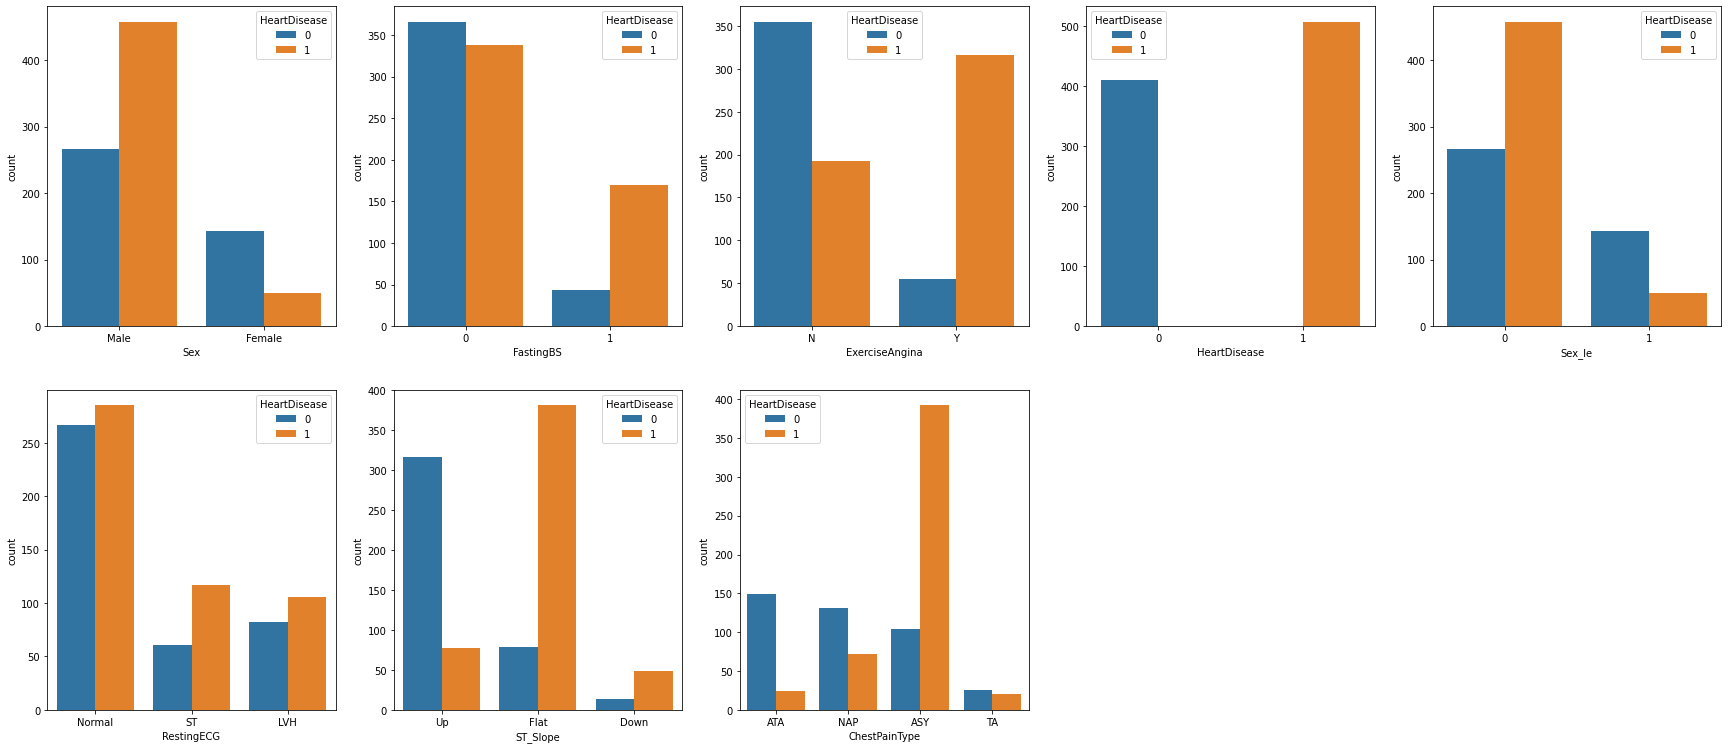

In [ ]:
plt.figure(figsize=(30, 20))
for i in enumerate(fhs_cat.columns):
    plt.subplot(3,5, i[0] + 1)
    sns.countplot(x=i[1], hue='HeartDisease', data=fhs_cat)

Continuous Variables

In [13]:
## filter out a subset of catagorical variables
fhs_cont = df_fhs.select_dtypes(include=['int'])
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           918 non-null    int64
 1   RestingBP     918 non-null    int64
 2   Cholesterol   918 non-null    int64
 3   FastingBS     918 non-null    int64
 4   MaxHR         918 non-null    int64
 5   HeartDisease  918 non-null    int64
dtypes: int64(6)
memory usage: 43.2 KB


In [14]:
fhs_cont.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.400421
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,1.000000


<Axes: >

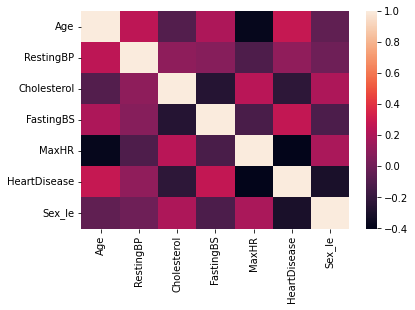

In [ ]:
sns.heatmap(fhs_cont.corr())

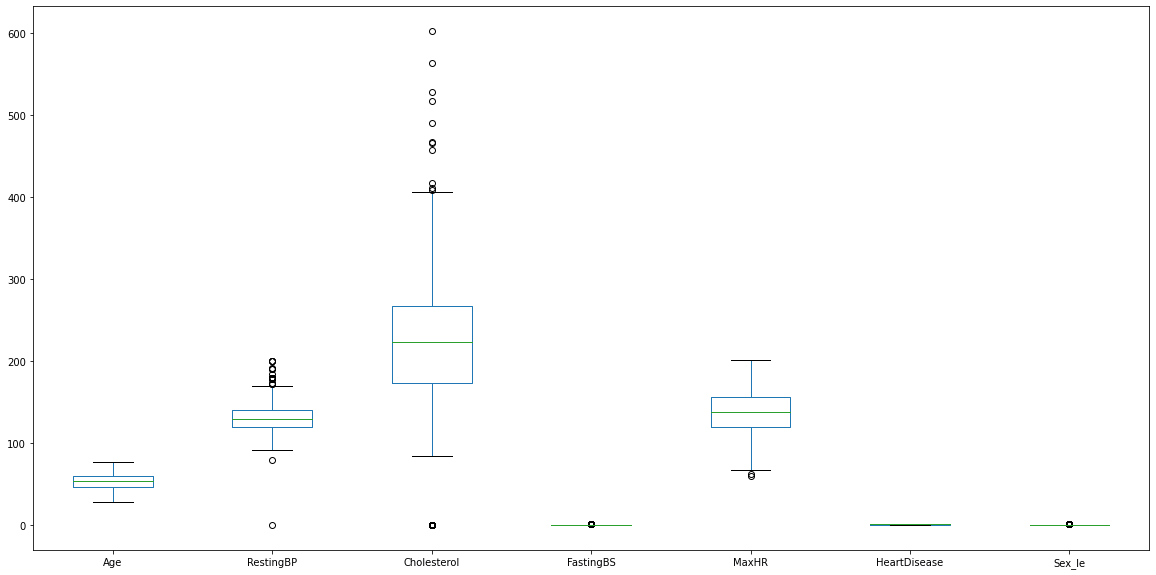

In [ ]:
plt.figure(figsize=(20,10))
fhs_cont.boxplot(grid=False)
plt.show()

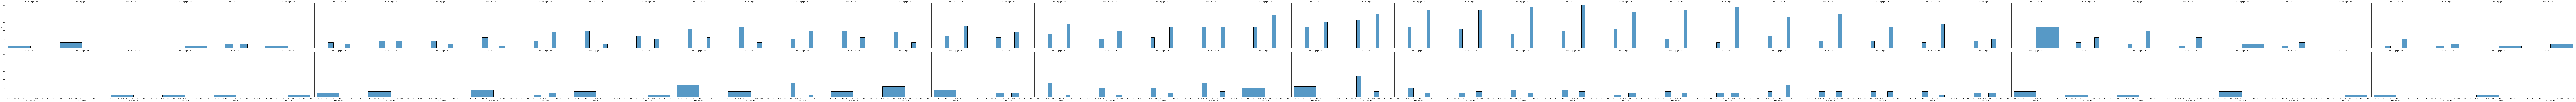

In [4]:
g = sns.FacetGrid(df_fhs, row='Sex', col='Age', height=5)
g.map(sns.histplot,'HeartDisease',)
plt.show()

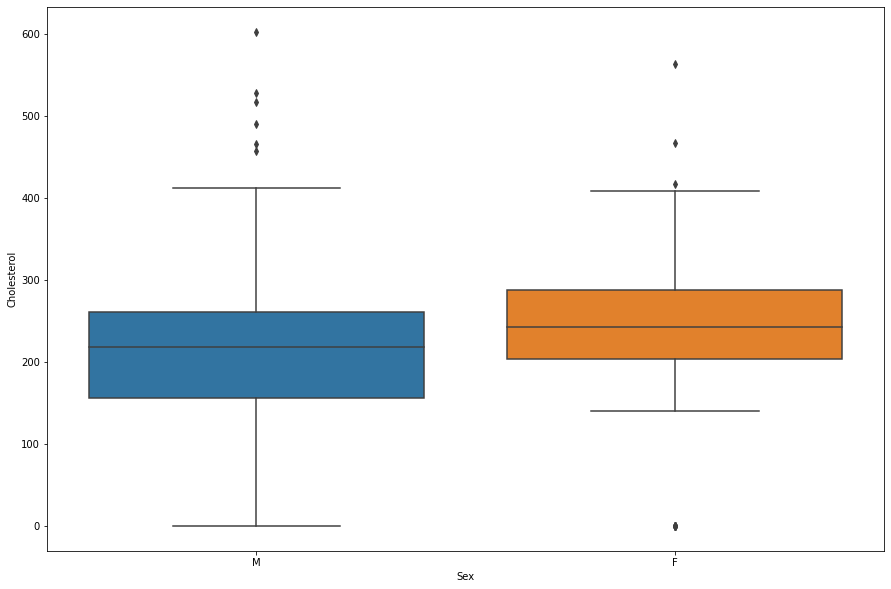

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_fhs, x="Sex", y="Cholesterol" , ax=ax)
plt.show()

## Generate Machine Learning Model

In [6]:
## distribution in target variable
df_fhs['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

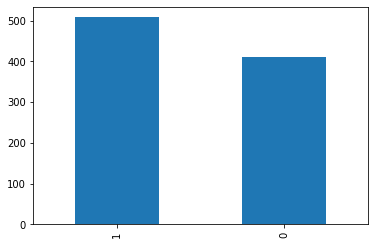

In [7]:
## visualize the doistribution in target variable-barchart
df_fhs['HeartDisease'].value_counts().plot(kind='bar')
plt.show()

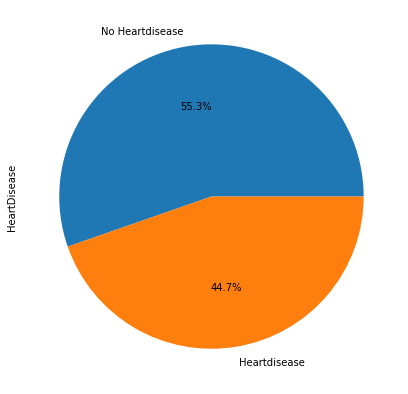

In [9]:
## visualize the distribition in target variable-piechart
plt.figure(figsize=(10,7))
df_fhs['HeartDisease'].value_counts().plot(kind='pie', autopct= '%1.1f%%', labels=['No Heartdisease', 'Heartdisease'])
plt.show()


# 1st Split(into X and y)

In [15]:
#seperate array into input (X) and output (y) components
X = fhs_cont
X.shape

(918, 6)

In [16]:
## create the response/outcome matrix
y=df_fhs['HeartDisease']
y.shape

(918,)